<a href="https://colab.research.google.com/github/ZeyadZanaty/offenseval/blob/master/offenseval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning to download classes

In [64]:
'''
!git clone https://github.com/ZeyadZanaty/offenseval.git
%cd offenseval
%matplotlib inline
'''

'\n!git clone https://github.com/ZeyadZanaty/offenseval.git\n%cd offenseval\n%matplotlib inline\n'

## Imports

In [ ]:
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'averaged_perceptron_tagger', 'averaged_perceptron_tagger_eng', 'punkt_tab'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colineleteurtre/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/colineleteurtre/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/colineleteurtre/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/colineleteurtre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
%reload_ext autoreload
%autoreload 2

In [24]:
from DataReader import DataReader
print("Vectorizer")
from Vectorizer import Vectorizer
print("classifier")
from Classifier import Classifier
print("deeplearning")
from DeepLearning import DeepLearner
print("preprocessor")
from Preprocessor import Preprocessor
print("sklearn")
from sklearn.model_selection import train_test_split as split
print("numpy")
import numpy as np

Vectorizer
classifier
deeplearning
preprocessor
sklearn
numpy


# Subtask A

## Reading data and splitting

In [25]:
dr = DataReader('./datasets/training-v1/offenseval-training-v1.tsv', 'A')
data, labels = dr.get_labelled_data()
data, labels = dr.shuffle(data, labels, 'random')

# Split dataset into training and testing sets
tr_data, tst_data, tr_labels, tst_labels = split(data, labels, test_size=0.3)


Reading Data: 13241it [00:00, 56106.09it/s]


## Initializing objects

In [26]:
preprocessors = [('lemmatize'), ('remove_stopwords', 'lemmatize'),
                 ('remove_stopwords', 'stem'), ('remove_stopwords', 'lemmatize'),
                 ('remove_stopwords', 'lemmatize'), ('remove_stopwords')]

vectorizers = ['count', 'count', 'count', 'tfidf', 'glove']

classifiers = [('RandomForest', {'n_estimators': 30}),
               ('LogisticRegression', {'penalty': 'l2', 'solver': 'sag'}),
               ('M-NaiveBayes', {'alpha': 5, 'fit_prior': True}),
               ('KNN', {'n_neighbors': 5}),
               ('SVC', {'C': 10, 'kernel': 'rbf'})]

# Prepare preprocessors, vectorizers, and classifiers
for i in range(len(vectorizers)):
    preprocessors[i] = Preprocessor(preprocessors[i])
    vectorizers[i] = Vectorizer(vectorizers[i])
    classifiers[i] = Classifier(*classifiers[i])

## Training classifiers

In [27]:
tst_vecs = []
tr_vecs = []
for i in range(len(classifiers)):
  tr_data_clean = preprocessors[i].clean(tr_data)
  tst_data_clean = preprocessors[i].clean(tst_data)
  
  tr_vecs.append(vectorizers[i].vectorize(tr_data_clean))
  tst_vecs.append(vectorizers[i].vectorize(tst_data_clean))
  
  classifiers[i].fit(tr_vecs[i], tr_labels)

Tokenization: 9268it [00:05, 1579.74it/s]0<?, ?it/s]
Lemmatization: 9268it [00:30, 307.19it/s]5<00:05,  5.88s/it]
Preprocessing: 100%|██████████| 2/2 [00:36<00:00, 18.03s/it]
Tokenization: 3972it [00:01, 2806.34it/s]0<?, ?it/s]
Lemmatization: 3972it [00:09, 414.11it/s]1<00:01,  1.42s/it]
Preprocessing: 100%|██████████| 2/2 [00:11<00:00,  5.51s/it]
Tokenization: 9268it [00:04, 2003.41it/s]0<?, ?it/s]
Stopwords Removal: 9268it [00:00, 31476.70it/s]9,  4.69s/it]
Lemmatization: 9268it [00:11, 833.56it/s]5<00:02,  2.12s/it]
Preprocessing: 100%|██████████| 3/3 [00:16<00:00,  5.38s/it]
Tokenization: 3972it [00:01, 2859.53it/s]0<?, ?it/s]
Stopwords Removal: 3972it [00:00, 35448.22it/s]2,  1.39s/it]
Lemmatization: 3972it [00:04, 811.28it/s]1<00:00,  1.55it/s]
Preprocessing: 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  war


Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 9268/9268 [00:04<00:00, 2305.27it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 3972/3972 [00:01<00:00, 2032.38it/s]


## Testing and plotting

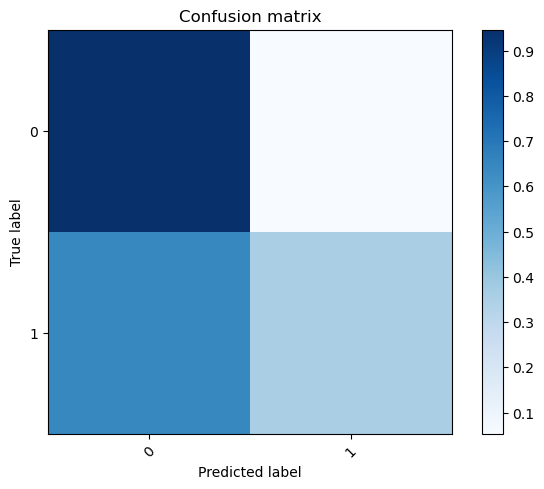

Accuracy: 0.7492447129909365, Classifier: ABCMeta, Params: {'n_estimators': 30}


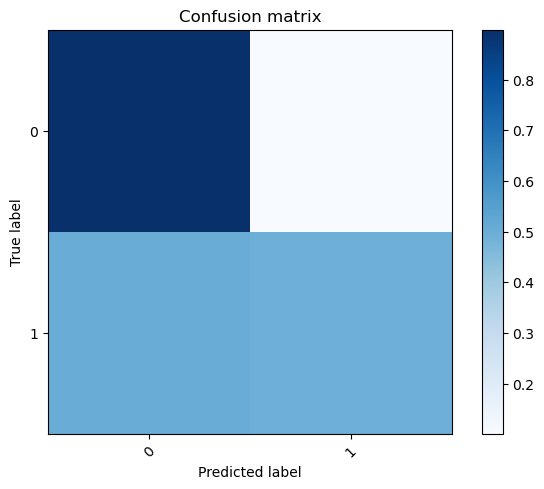

Accuracy: 0.763595166163142, Classifier: type, Params: {'penalty': 'l2', 'solver': 'sag'}


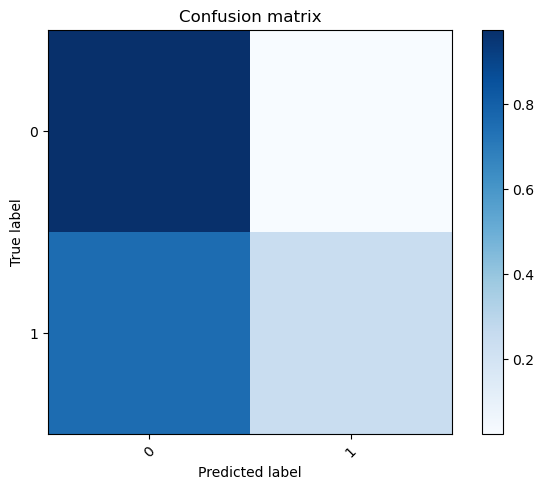

Accuracy: 0.7318731117824774, Classifier: ABCMeta, Params: {'alpha': 5, 'fit_prior': True}


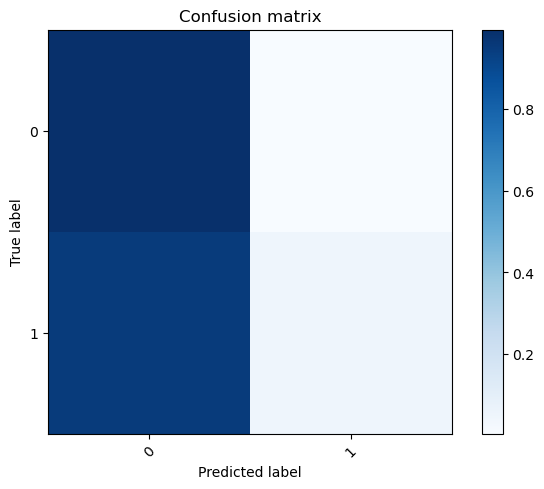

Accuracy: 0.6797583081570997, Classifier: ABCMeta, Params: {'n_neighbors': 5}


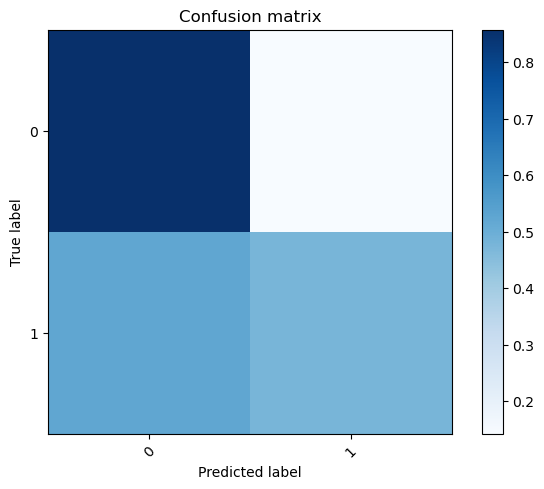

Accuracy: 0.730110775427996, Classifier: ABCMeta, Params: {'C': 10, 'kernel': 'rbf'}


[0.7492447129909365,
 0.763595166163142,
 0.7318731117824774,
 0.6797583081570997,
 0.730110775427996]

In [28]:
accs = []
for i, clf in enumerate(classifiers):
    acc = clf.test_and_plot(tst_vecs[i], tst_labels, class_num=2)
    print(f"Accuracy: {acc}, Classifier: {clf.classifier.__class__.__name__}, Params: {clf.params}")
    accs.append(acc)

accs

# Subtask B

## Reading data and splitting

In [29]:
dr_b = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','B')
data_b,labels_b = dr_b.get_labelled_data()
data_b,labels_b = dr_b.shuffle(data_b,labels_b,'random')

tr_data_b,tst_data_b,tr_labels_b,tst_labels_b = split(data_b,labels_b,test_size=0.3)

Reading Data: 13241it [00:00, 89938.98it/s] 


## Initializing objects

In [30]:
preprocessors_b = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers_b = ['count','count','count','tfidf','glove']

classifiers_b = [('RandomForest',{'n_estimators':30}),
               ('LogisticRegression',{'penalty':'l2','solver':'sag'}),
              ('M-NaiveBayes',{'alpha':5,'fit_prior':True}),
              ('KNN',{'n_neighbors':5}),('SVC',{'C':10,'kernel':'rbf'})]

for i in range(len(vectorizers_b)):
  preprocessors_b[i] = Preprocessor(preprocessors_b[i])
  vectorizers_b[i] = Vectorizer(vectorizers_b[i])
  classifiers_b[i] = Classifier(*classifiers_b[i])

## Training classifiers

In [31]:
tst_vecs_b = []
tr_vecs_b = []
for i in range(len(classifiers_b)):
  tr_data_clean_b = preprocessors_b[i].clean(tr_data_b)
  tst_data_clean_b = preprocessors_b[i].clean(tst_data_b)
  
  tr_vecs_b.append(vectorizers_b[i].vectorize(tr_data_clean_b))
  tst_vecs_b.append(vectorizers_b[i].vectorize(tst_data_clean_b))
  
  classifiers_b[i].fit(tr_vecs_b[i],tr_labels_b)

Tokenization: 3080it [00:02, 1283.55it/s]0<?, ?it/s]
Lemmatization: 3080it [00:11, 269.35it/s]2<00:02,  2.40s/it]
Preprocessing: 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]
Tokenization: 1320it [00:01, 1286.01it/s]0<?, ?it/s]
Lemmatization: 1320it [00:06, 216.47it/s]1<00:01,  1.03s/it]
Preprocessing: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]
Tokenization: 3080it [00:01, 1987.32it/s]0<?, ?it/s]
Stopwords Removal: 3080it [00:00, 33355.08it/s]3,  1.56s/it]
Lemmatization: 3080it [00:06, 466.66it/s]1<00:00,  1.42it/s]
Preprocessing: 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]
Tokenization: 1320it [00:01, 1076.26it/s]0<?, ?it/s]
Stopwords Removal: 1320it [00:00, 9901.89it/s] 2,  1.24s/it]
Lemmatization: 1320it [00:04, 327.14it/s]1<00:00,  1.68it/s]
Preprocessing: 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  war


Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 3080/3080 [00:01<00:00, 2290.75it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 1320/1320 [00:00<00:00, 2294.64it/s]


## Testing and plotting

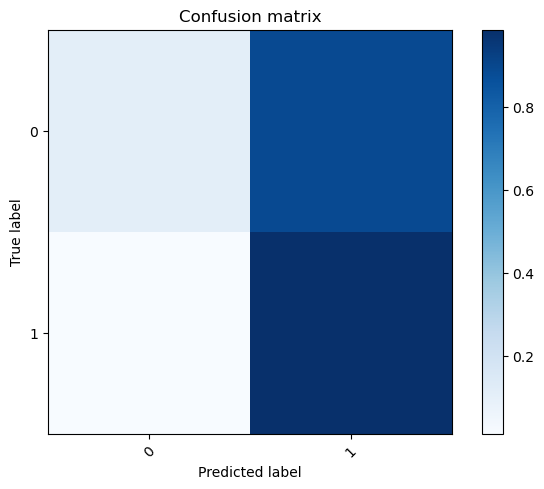

0.8833333333333333 RandomForestClassifier {'n_estimators': 30}


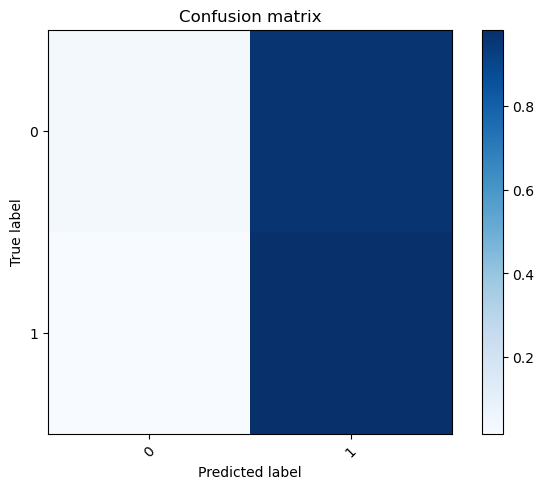

0.871969696969697 LogisticRegression {'penalty': 'l2', 'solver': 'sag'}


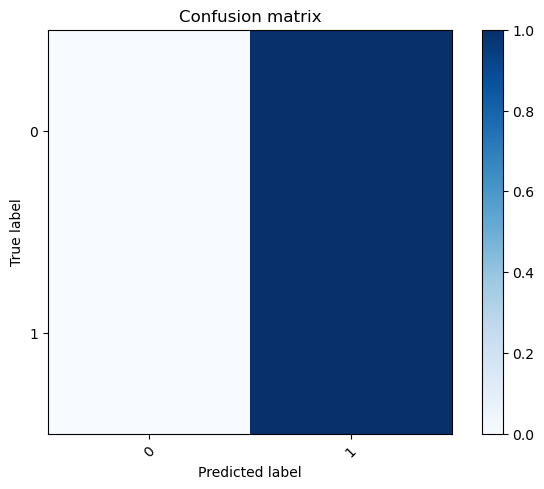

0.8833333333333333 MultinomialNB {'alpha': 5, 'fit_prior': True}


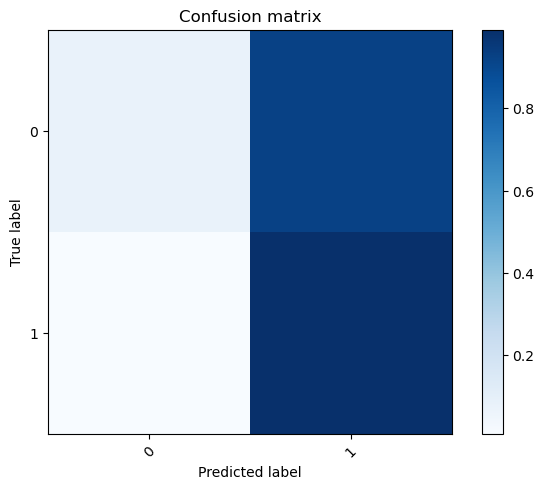

0.884090909090909 KNeighborsClassifier {'n_neighbors': 5}


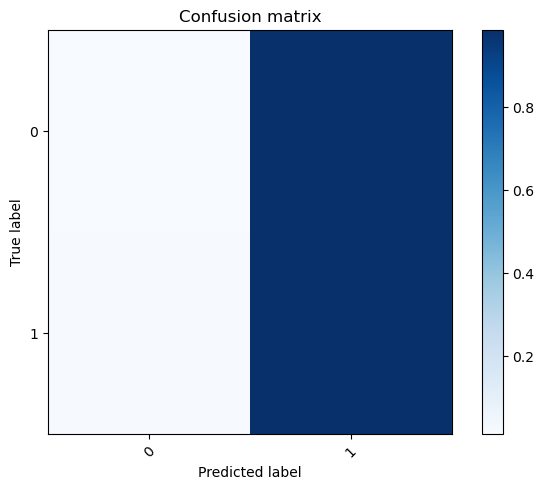

0.8681818181818182 SVC {'C': 10, 'kernel': 'rbf'}


[0.8833333333333333,
 0.871969696969697,
 0.8833333333333333,
 0.884090909090909,
 0.8681818181818182]

In [32]:
accs_b = []
for i,clf in enumerate(classifiers_b):
  acc = clf.test_and_plot(tst_vecs_b[i],tst_labels_b,class_num=2)
  print(acc,clf.classifier.__name__,clf.params)
  accs_b.append(acc)
  
accs_b

# Subtask C

## Reading data and splitting

In [33]:
dr_c = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','C')
data_c,labels_c = dr_c.get_labelled_data()
data_c,labels_c = dr_c.shuffle(data_c,labels_c,'random')

tr_data_c,tst_data_c,tr_labels_c,tst_labels_c = split(data_c,labels_c,test_size=0.3)

Reading Data: 13241it [00:00, 134346.06it/s]


## Initializing objects

In [34]:
preprocessors_c = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers_c = ['count','count','count','tfidf','glove']

classifiers_c = [('RandomForest',{'n_estimators':30}),
               ('LogisticRegression',{'penalty':'l2','solver':'sag'}),
              ('M-NaiveBayes',{'alpha':5,'fit_prior':True}),
              ('KNN',{'n_neighbors':5}),('SVC',{'C':10,'kernel':'rbf'})]

for i in range(len(vectorizers_c)):
  preprocessors_c[i] = Preprocessor(preprocessors_c[i])
  vectorizers_c[i] = Vectorizer(vectorizers_c[i])
  classifiers_c[i] = Classifier(*classifiers_c[i])

## Training classifiers

In [35]:
tst_vecs_c = []
tr_vecs_c = []
for i in range(len(classifiers_c)):
  tr_data_clean_c = preprocessors_c[i].clean(tr_data_c)
  tst_data_clean_c = preprocessors_c[i].clean(tst_data_c)
  
  tr_vecs_c.append(vectorizers_c[i].vectorize(tr_data_clean_c))
  tst_vecs_c.append(vectorizers_c[i].vectorize(tst_data_clean_c))
  
  classifiers_c[i].fit(tr_vecs_c[i],tr_labels_c)

Tokenization: 2713it [00:02, 961.43it/s] 0<?, ?it/s]
Lemmatization: 2713it [00:12, 211.32it/s]2<00:02,  2.83s/it]
Preprocessing: 100%|██████████| 2/2 [00:15<00:00,  7.84s/it]
Tokenization: 1163it [00:01, 1010.95it/s]0<?, ?it/s]
Lemmatization: 1163it [00:04, 236.40it/s]1<00:01,  1.16s/it]
Preprocessing: 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]
Tokenization: 2713it [00:00, 3003.78it/s]0<?, ?it/s]
Stopwords Removal: 2713it [00:00, 34447.40it/s]1,  1.10it/s]
Lemmatization: 2713it [00:04, 660.30it/s]
Preprocessing: 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]
Tokenization: 1163it [00:00, 2406.98it/s]0<?, ?it/s]
Stopwords Removal: 1163it [00:00, 37717.86it/s]0,  2.04it/s]
Lemmatization: 1163it [00:01, 623.73it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
Tokenization: 2713it [00:01, 2631.22it/s]0<?, ?it/s]
Stopwords Removal: 2713it [00:00, 31742.77it/s]2,  1.04s/it]
Stemming: 2713it [00:00, 3194.23it/s]00:01<00:00,  2.05it/s]
Preprocessing: 100%|██████████| 3/3 [00:0


Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 2713/2713 [00:01<00:00, 2183.75it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 1163/1163 [00:00<00:00, 2133.30it/s]


## Testing and plotting

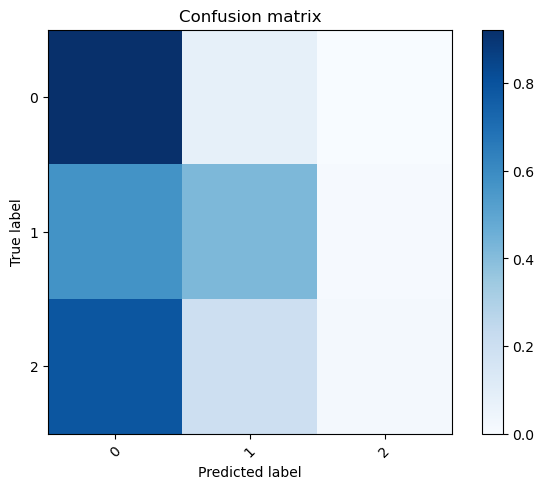

0.6878761822871883 RandomForestClassifier {'n_estimators': 30}


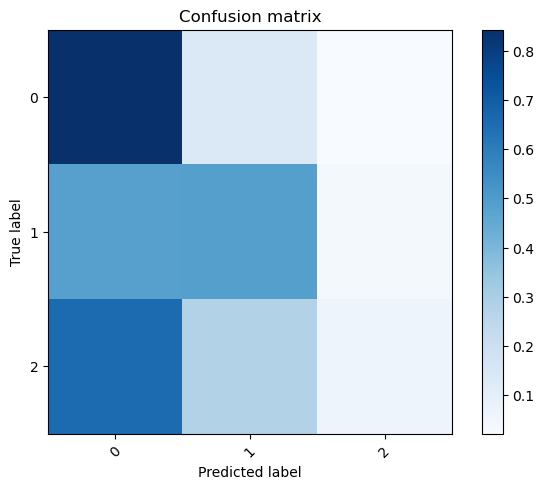

0.6603611349957008 LogisticRegression {'penalty': 'l2', 'solver': 'sag'}


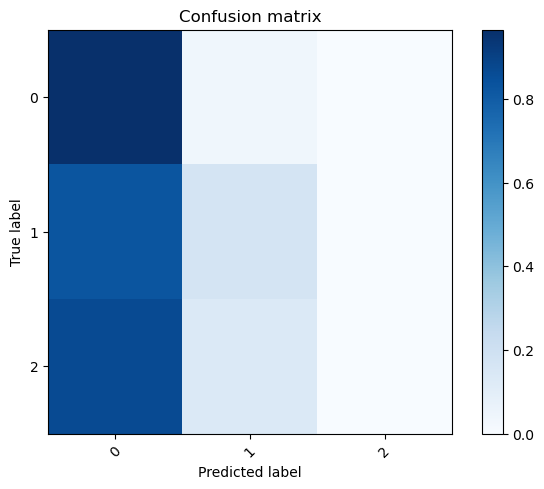

0.646603611349957 MultinomialNB {'alpha': 5, 'fit_prior': True}


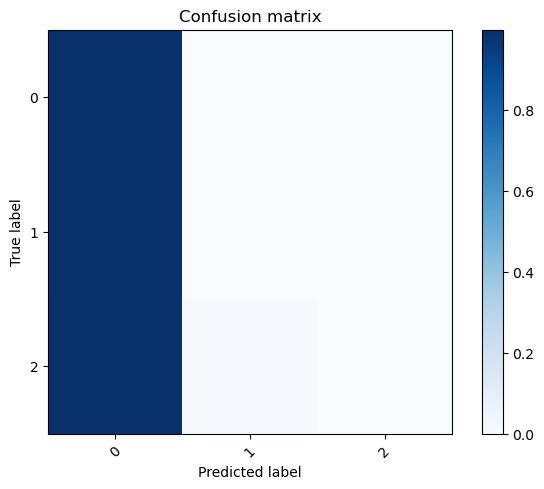

0.6216680997420464 KNeighborsClassifier {'n_neighbors': 5}


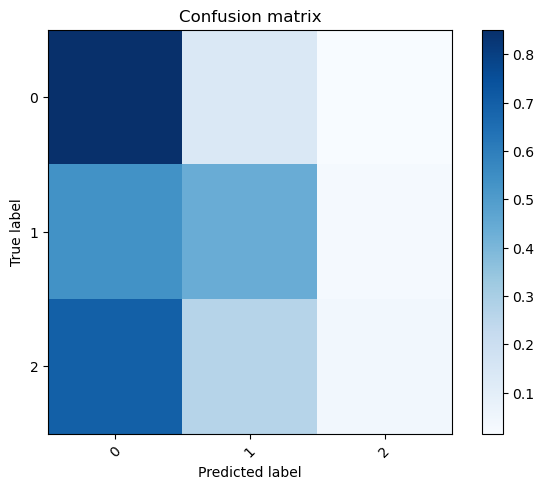

0.6509028374892519 SVC {'C': 10, 'kernel': 'rbf'}


[0.6878761822871883,
 0.6603611349957008,
 0.646603611349957,
 0.6216680997420464,
 0.6509028374892519]

In [36]:
accs_c = []
for i,clf in enumerate(classifiers_c):
  acc = clf.test_and_plot(tst_vecs_c[i],tst_labels_c,class_num=3)
  print(acc,clf.classifier.__name__,clf.params)
  accs_c.append(acc)
  
accs_c

# Neural Nets

## Subtask A

### Reading data and cleaning

In [37]:
dr_nn = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','A')
data_nn,labels_nn = dr_nn.get_labelled_data()
data_nn,labels_nn = dr_nn.shuffle(data_nn,labels_nn,'random')

tr_data_nn,tst_data_nn,tr_labels_nn,tst_labels_nn = split(data_nn,labels_nn,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn = prp.clean(tr_data_nn)
tst_data_clean_nn = prp.clean(tst_data_nn)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn)

Reading Data: 13241it [00:00, 178596.68it/s]
Tokenization: 9268it [00:03, 3021.09it/s]0<?, ?it/s]
Stopwords Removal: 9268it [00:00, 41465.52it/s]6,  3.07s/it]
Lemmatization: 9268it [00:10, 910.12it/s]3<00:01,  1.40s/it]
Preprocessing: 100%|██████████| 3/3 [00:13<00:00,  4.50s/it]
Tokenization: 3972it [00:01, 3228.81it/s]0<?, ?it/s]
Stopwords Removal: 3972it [00:00, 41126.11it/s]2,  1.24s/it]
Lemmatization: 3972it [00:04, 919.41it/s]1<00:00,  1.76it/s]
Preprocessing: 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Training LSTM

In [41]:
lstm = DeepLearner(tr_data_clean_nn,tr_labels_nn,vocab_length=vct.vocab_length,model_type='LSTM')
lstm.train(epochs=60)

/Users/colineleteurtre/Library/CloudStorage/OneDrive-Personnel/Documents/cours/EPFL/MA2/deep_learning/paper1/offenseval/DeepLearning.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data), labels, test_size=0.35, stratify=labels


Epoch 1/60, Loss: 0.5633
Epoch 2/60, Loss: 0.6883
Epoch 3/60, Loss: 0.5633
Epoch 4/60, Loss: 0.5633
Epoch 5/60, Loss: 0.5633
Epoch 6/60, Loss: 0.8133
Epoch 7/60, Loss: 0.5633
Epoch 8/60, Loss: 0.5633
Epoch 9/60, Loss: 0.5633
Epoch 10/60, Loss: 0.5633
Epoch 11/60, Loss: 0.9383
Epoch 12/60, Loss: 0.8133
Epoch 13/60, Loss: 0.5633
Epoch 14/60, Loss: 0.9383
Epoch 15/60, Loss: 0.5633
Epoch 16/60, Loss: 0.5633
Epoch 17/60, Loss: 0.8133
Epoch 18/60, Loss: 0.8132
Epoch 19/60, Loss: 0.4383
Epoch 20/60, Loss: 0.4383
Epoch 21/60, Loss: 0.3133
Epoch 22/60, Loss: 0.5633
Epoch 23/60, Loss: 0.4383
Epoch 24/60, Loss: 0.6883
Epoch 25/60, Loss: 0.8133
Epoch 26/60, Loss: 0.9383
Epoch 27/60, Loss: 0.3133
Epoch 28/60, Loss: 0.4383
Epoch 29/60, Loss: 0.9383
Epoch 30/60, Loss: 0.6883
Epoch 31/60, Loss: 0.6883
Epoch 32/60, Loss: 0.5633
Epoch 33/60, Loss: 0.4383
Epoch 34/60, Loss: 0.6883
Epoch 35/60, Loss: 0.5633
Epoch 36/60, Loss: 0.6883
Epoch 37/60, Loss: 0.5633
Epoch 38/60, Loss: 0.5633
Epoch 39/60, Loss: 0.

### Testing LSTM and plotting

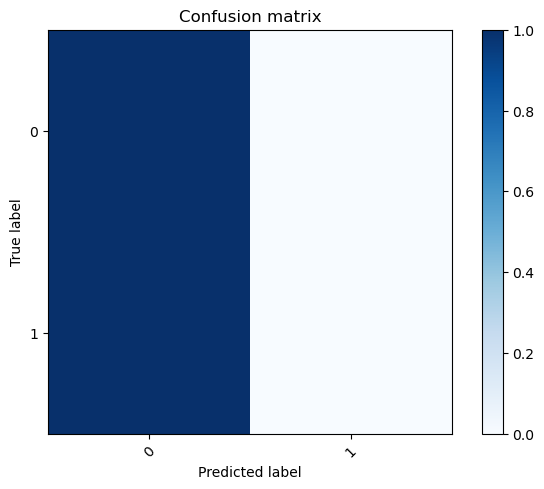

Test Loss: 0.6559, Accuracy: 65.74%
LSTM 0.6573514342308044


In [44]:
acc = lstm.test_and_plot(tst_data_clean_nn,tst_labels_nn)
print('LSTM',acc)

### Training CNN

In [49]:
cnn = DeepLearner(tr_data_clean_nn,tr_labels_nn,vocab_length=vct.vocab_length,model_type='CNN')
cnn.train(epochs=10)

/Users/colineleteurtre/Library/CloudStorage/OneDrive-Personnel/Documents/cours/EPFL/MA2/deep_learning/paper1/offenseval/DeepLearning.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data), labels, test_size=0.35, stratify=labels


Epoch 1/10, Loss: 0.8133
Epoch 2/10, Loss: 0.6883
Epoch 3/10, Loss: 0.8133
Epoch 4/10, Loss: 0.5633
Epoch 5/10, Loss: 0.5633
Epoch 6/10, Loss: 0.5633
Epoch 7/10, Loss: 0.9383
Epoch 8/10, Loss: 0.6883
Epoch 9/10, Loss: 0.6883
Epoch 10/10, Loss: 0.4383


### Testing CNN and plotting

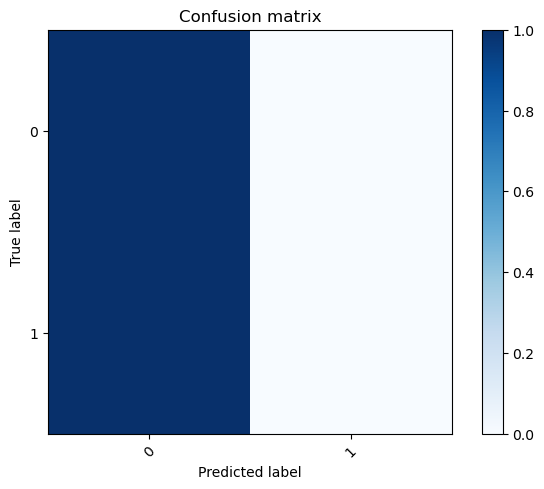

Test Loss: 0.6559, Accuracy: 65.74%
CNN 0.6573514342308044


In [50]:
acc = cnn.test_and_plot(tst_data_clean_nn,tst_labels_nn)
print('CNN',acc)

## Subtask B

### Reading data and cleaning

In [51]:
dr_nn_b = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','B')
data_nn_b,labels_nn_b = dr_nn_b.get_labelled_data()
data_nn_b,labels_nn_b = dr_nn_b.shuffle(data_nn_b,labels_nn_b,'random')

tr_data_nn_b,tst_data_nn_b,tr_labels_nn_b,tst_labels_nn_b = split(data_nn_b,labels_nn_b,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn_b = prp.clean(tr_data_nn_b)
tst_data_clean_nn_b = prp.clean(tst_data_nn_b)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn_b)

Reading Data: 13241it [00:00, 71078.16it/s]
Tokenization: 3080it [00:03, 909.14it/s]00<?, ?it/s]
Stopwords Removal: 3080it [00:00, 12846.59it/s]6,  3.40s/it]
Lemmatization: 3080it [00:06, 488.41it/s]3<00:01,  1.57s/it]
Preprocessing: 100%|██████████| 3/3 [00:10<00:00,  3.35s/it]
Tokenization: 1320it [00:00, 2108.98it/s]0<?, ?it/s]
Stopwords Removal: 1320it [00:00, 23355.36it/s]1,  1.58it/s]
Lemmatization: 1320it [00:01, 692.72it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Training LSTM

In [53]:
lstm_b = DeepLearner(tr_data_clean_nn_b,tr_labels_nn_b,vocab_length=vct.vocab_length,model_type='LSTM')
lstm_b.train(epochs=60)

/Users/colineleteurtre/Library/CloudStorage/OneDrive-Personnel/Documents/cours/EPFL/MA2/deep_learning/paper1/offenseval/DeepLearning.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data), labels, test_size=0.35, stratify=labels


Epoch 1/60, Loss: 0.4245
Epoch 2/60, Loss: 0.4244
Epoch 3/60, Loss: 0.4244
Epoch 4/60, Loss: 0.3688
Epoch 5/60, Loss: 0.5355
Epoch 6/60, Loss: 0.4244
Epoch 7/60, Loss: 0.3688
Epoch 8/60, Loss: 0.3688
Epoch 9/60, Loss: 0.5355
Epoch 10/60, Loss: 0.4799
Epoch 11/60, Loss: 0.4799
Epoch 12/60, Loss: 0.4799
Epoch 13/60, Loss: 0.4244
Epoch 14/60, Loss: 0.7022
Epoch 15/60, Loss: 0.5355
Epoch 16/60, Loss: 0.4244
Epoch 17/60, Loss: 0.3688
Epoch 18/60, Loss: 0.3688
Epoch 19/60, Loss: 0.4799
Epoch 20/60, Loss: 0.4799
Epoch 21/60, Loss: 0.3133
Epoch 22/60, Loss: 0.3688
Epoch 23/60, Loss: 0.5355
Epoch 24/60, Loss: 0.3133
Epoch 25/60, Loss: 0.4244
Epoch 26/60, Loss: 0.4244
Epoch 27/60, Loss: 0.4799
Epoch 28/60, Loss: 0.4799
Epoch 29/60, Loss: 0.4244
Epoch 30/60, Loss: 0.5355
Epoch 31/60, Loss: 0.4244
Epoch 32/60, Loss: 0.4799
Epoch 33/60, Loss: 0.4244
Epoch 34/60, Loss: 0.5910
Epoch 35/60, Loss: 0.4244
Epoch 36/60, Loss: 0.4799
Epoch 37/60, Loss: 0.3133
Epoch 38/60, Loss: 0.4799
Epoch 39/60, Loss: 0.

### Testing LSTM and plotting

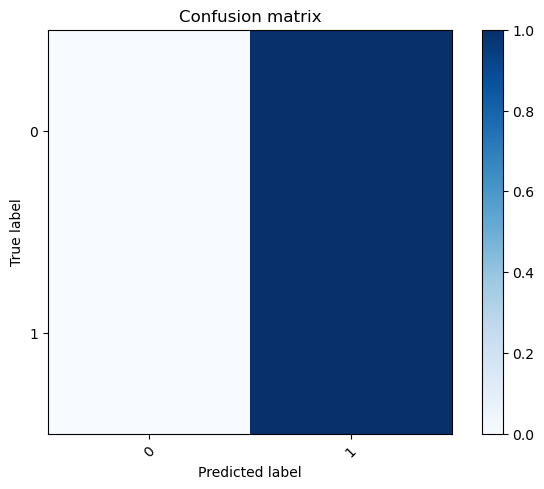

Test Loss: 0.4307, Accuracy: 88.26%
LSTM 0.8825757503509521


In [54]:
acc = lstm_b.test_and_plot(tst_data_clean_nn_b,tst_labels_nn_b)
print('LSTM',acc)

### Training CNN

In [55]:
cnn_b = DeepLearner(tr_data_clean_nn_b,tr_labels_nn_b,vocab_length=vct.vocab_length,model_type='CNN')
cnn_b.train(epochs=10)

/Users/colineleteurtre/Library/CloudStorage/OneDrive-Personnel/Documents/cours/EPFL/MA2/deep_learning/paper1/offenseval/DeepLearning.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data), labels, test_size=0.35, stratify=labels


Epoch 1/10, Loss: 0.3688
Epoch 2/10, Loss: 0.4244
Epoch 3/10, Loss: 0.4799
Epoch 4/10, Loss: 0.4799
Epoch 5/10, Loss: 0.4244
Epoch 6/10, Loss: 0.3688
Epoch 7/10, Loss: 0.3688
Epoch 8/10, Loss: 0.3133
Epoch 9/10, Loss: 0.3688
Epoch 10/10, Loss: 0.3688


### Testing CNN and plotting

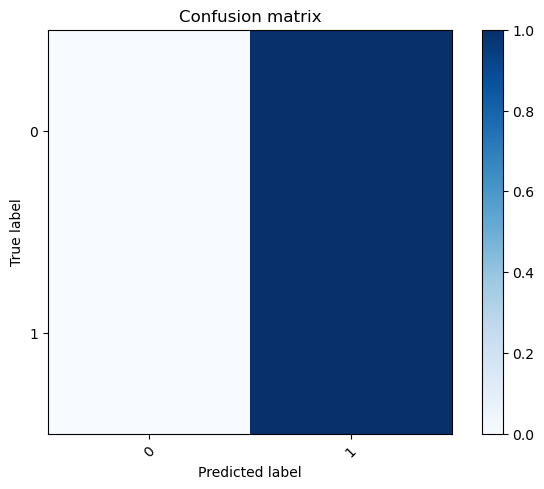

Test Loss: 0.4307, Accuracy: 88.26%
CNN 0.8825757503509521


In [56]:
acc = cnn_b.test_and_plot(tst_data_clean_nn_b,tst_labels_nn_b)
print('CNN',acc)

## Subtask C

### Reading data and cleaning

In [57]:
dr_nn_c = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','C')
data_nn_c,labels_nn_c = dr_nn_c.get_labelled_data()
data_nn_c,labels_nn_c = dr_nn_c.shuffle(data_nn_c,labels_nn_c,'random')

tr_data_nn_c,tst_data_nn_c,tr_labels_nn_c,tst_labels_nn_c = split(data_nn_c,labels_nn_c,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn_c = prp.clean(tr_data_nn_c)
tst_data_clean_nn_c = prp.clean(tst_data_nn_c)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn_c)

Reading Data: 13241it [00:00, 80026.71it/s]
Tokenization: 2713it [00:02, 956.73it/s]00<?, ?it/s]
Stopwords Removal: 2713it [00:00, 8368.03it/s]05,  2.85s/it]
Lemmatization: 2713it [00:08, 335.11it/s]3<00:01,  1.37s/it]
Preprocessing: 100%|██████████| 3/3 [00:11<00:00,  3.77s/it]
Tokenization: 1163it [00:01, 1095.69it/s]0<?, ?it/s]
Stopwords Removal: 1163it [00:00, 29233.42it/s]2,  1.08s/it]
Lemmatization: 1163it [00:02, 521.63it/s]
Preprocessing: 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Training LSTM

In [58]:
lstm_c = DeepLearner(tr_data_clean_nn_c,tr_labels_nn_c,vocab_length=vct.vocab_length,model_type='LSTM')
lstm_c.train(epochs=60)

/Users/colineleteurtre/Library/CloudStorage/OneDrive-Personnel/Documents/cours/EPFL/MA2/deep_learning/paper1/offenseval/DeepLearning.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data), labels, test_size=0.35, stratify=labels


Epoch 1/60, Loss: 0.8086
Epoch 2/60, Loss: 1.1229
Epoch 3/60, Loss: 0.9229
Epoch 4/60, Loss: 0.9229
Epoch 5/60, Loss: 1.0372
Epoch 6/60, Loss: 1.0943
Epoch 7/60, Loss: 0.7800
Epoch 8/60, Loss: 0.9229
Epoch 9/60, Loss: 0.8657
Epoch 10/60, Loss: 0.8657
Epoch 11/60, Loss: 0.9229
Epoch 12/60, Loss: 0.8657
Epoch 13/60, Loss: 0.9800
Epoch 14/60, Loss: 1.0086
Epoch 15/60, Loss: 0.8657
Epoch 16/60, Loss: 0.7800
Epoch 17/60, Loss: 1.0372
Epoch 18/60, Loss: 0.9514
Epoch 19/60, Loss: 1.0943
Epoch 20/60, Loss: 0.9800
Epoch 21/60, Loss: 0.8372
Epoch 22/60, Loss: 0.9229
Epoch 23/60, Loss: 0.9514
Epoch 24/60, Loss: 0.7514
Epoch 25/60, Loss: 0.9514
Epoch 26/60, Loss: 0.9514
Epoch 27/60, Loss: 0.9800
Epoch 28/60, Loss: 0.8943
Epoch 29/60, Loss: 0.8657
Epoch 30/60, Loss: 0.8372
Epoch 31/60, Loss: 0.9514
Epoch 32/60, Loss: 0.9229
Epoch 33/60, Loss: 0.8086
Epoch 34/60, Loss: 1.0086
Epoch 35/60, Loss: 1.0372
Epoch 36/60, Loss: 0.9800
Epoch 37/60, Loss: 0.8943
Epoch 38/60, Loss: 0.8086
Epoch 39/60, Loss: 0.

### Testing LSTM and plotting

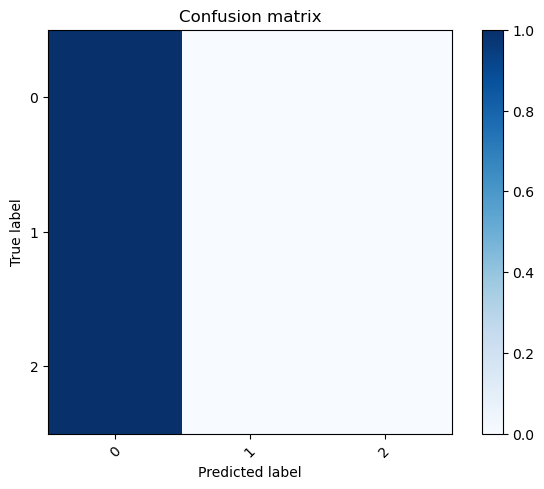

Test Loss: 0.9444, Accuracy: 60.71%
LSTM 0.6070507168769836


In [59]:
acc = lstm_c.test_and_plot(tst_data_clean_nn_c,tst_labels_nn_c,3)
print('LSTM',acc)

### Training CNN

In [60]:
cnn_c = DeepLearner(tr_data_clean_nn_c,tr_labels_nn_c,vocab_length=vct.vocab_length,model_type='CNN')
cnn_c.train(epochs=10)

/Users/colineleteurtre/Library/CloudStorage/OneDrive-Personnel/Documents/cours/EPFL/MA2/deep_learning/paper1/offenseval/DeepLearning.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data), labels, test_size=0.35, stratify=labels


Epoch 1/10, Loss: 0.8372
Epoch 2/10, Loss: 0.9229
Epoch 3/10, Loss: 0.8657
Epoch 4/10, Loss: 0.8372
Epoch 5/10, Loss: 0.7514
Epoch 6/10, Loss: 0.9514
Epoch 7/10, Loss: 0.9229
Epoch 8/10, Loss: 1.0086
Epoch 9/10, Loss: 0.9229
Epoch 10/10, Loss: 0.8943


### Testing CNN and plotting

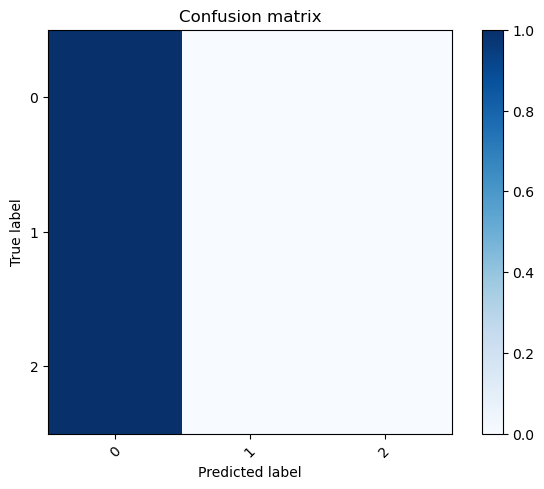

Test Loss: 0.9444, Accuracy: 60.71%
CNN 0.6070507168769836


In [61]:
acc = cnn_c.test_and_plot(tst_data_clean_nn_c,tst_labels_nn_c,3)
print('CNN',acc)